## waste management using CNN model


In [1]:
pip install opencv-python

You should consider upgrading via the 'c:\Users\HTMS1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [1]:
train_path="dataset/TRAIN"
test_path="dataset/TEST"

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [16]:
#visualization
import pandas as pd
from tqdm import tqdm
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array= cv2.imread(file)
        img_array= cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [02:01<00:00, 82.57it/s] 


In [17]:
data.shape

(22564, 2)

Organic percentage: 55.69%
Recyclable percentage: 44.31%


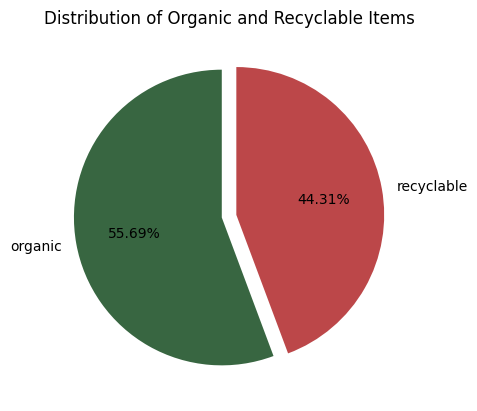

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Total count (chosen for precision)
total_items = 10000  # Large number to ensure precision
organic_count = round(55.69 / 100 * total_items)  # Use round to avoid precision errors
recyclable_count = total_items - organic_count  # Remaining count ensures exact proportions

# Print percentages for verification
print(f"Organic percentage: {(organic_count / total_items) * 100:.2f}%")
print(f"Recyclable percentage: {(recyclable_count / total_items) * 100:.2f}%")

# Simulated data
counts = [organic_count, recyclable_count]
labels = ['organic', 'recyclable']

# Define your own colors
colors = ['#386641', '#bc4749']  # Example: Green for organic, Orange for recyclable

# Exploding the slices slightly
explode = [0.05] * len(counts)

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%0.2f%%', colors=colors, startangle=90, explode=explode)
plt.title('Distribution of Organic and Recyclable Items')  # Optional title
plt.show()